## Data Science Blog Post 
This project has been conducted as part of Udacity's Data Scientists Nanodegree.Three business question should be answered related to a selected dataset. This project covers some Wine Analysis using the public dataset from Kaggle: www.kaggle.com/zynicide/wine-reviews.
#### Question 1: Are there differences in the wine  reviewers description for the best rated wines according to the least rated wines?  
#### Question 2: What are the best rated wines in different price categories? 
#### Question 3: What kind of grapes make the best wine?

In [2]:
#Import relevant libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', None)

from wordcloud import WordCloud, STOPWORDS

#This package give a more exploratory data analysis than the df.describe() function   
import pandas_profiling

### Data Gathering and Data Exploration 

In [3]:
#Public data set downloaded from https://www.kaggle.com/zynicide/wine-reviews and imported into dataframe
df = pd.read_csv('../Wine_Data/winemag-data-130k-v2.csv', sep=',')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               129971 non-null int64
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 13.9+ MB


In [5]:
df.sample(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
60746,60746,Italy,"The wine is subdued and clean on the nose and it doesn't exaggerate or mask the quality of fruit. This is executed in a bright, compact and streamlined style that combines freshness and firmness.",NaN,89,40.0,Tuscany,Brunello di Montalcino,NaN,NaN,NaN,Baricci 2007 Brunello di Montalcino,Sangiovese Grosso,Baricci
49793,49793,US,"Leave it to Ridge to make one of the best Zinfandels to come out of Paso Robles. Although the wine shows Paso's lush, ripe flavors and softness and is sweet in raspberry jam and chocolate, it maintains structural integrity. Drink it now with great barbecue.",Benito Dusi Ranch,91,30.0,California,Paso Robles,Central Coast,NaN,NaN,Ridge 2009 Benito Dusi Ranch Zinfandel (Paso Robles),Zinfandel,Ridge
87273,87273,US,"From a winery focused on Alsatian wines since starting in 1983, this tremendous Gewürztraminer is redolent with grilled lemon peels, lilac and a chalky minerality. On the elegant and tasty palate, there are white rocks, roasted nectarines, yellow apples and noticeable salinity.",NaN,92,20.0,California,Central Coast,Central Coast,Matt Kettmann,@mattkettmann,Claiborne & Churchill 2013 Gewurztraminer (Central Coast),Gewürztraminer,Claiborne & Churchill
110200,110200,South Africa,So fresh and inviting with lovely sweet pea and grass florals alongside soft notes of ripe nectarine and melon. The prickly mouth is loaded with orange oil citrus and a hint of banana unfolds on the long finish. A very clean and satisfying hand-picked Chenin Blanc that's a versatile wine for food pairing.,Original Unwooded,87,13.0,Coastal Region,NaN,NaN,Lauren Buzzeo,@laurbuzz,Raats Family 2009 Original Unwooded Chenin Blanc (Coastal Region),Chenin Blanc,Raats Family
1337,1337,Italy,"Elegant, savory and balanced, this opens with delicate orchard fruit, Mediterranean scrub and wet stone scents. The vibrant, ethereal palate delivers lemon, nectarine and pear fruit, buttressed by crisp acidity. A savory mineral note gives it a mouthwatering finish.",NaN,90,25.0,Southern Italy,Greco di Tufo,NaN,Kerin O’Keefe,@kerinokeefe,Di Meo 2016 Greco di Tufo,Greco,Di Meo


#### The dataset consist of 129971 wine reviews described by 14 feature to look into more detailed. From the info and sample many of the 14 features have missing values. 

In [6]:
#The pandas profiling reports gives a quick way to gaine some more exploratory data analysis than the df.describe() function   
#https://github.com/pandas-profiling/pandas-profiling - installed using pip
pandas_profiling.ProfileReport(df)

Number of variables,14
Number of observations,129971
Total Missing (%),11.3%
Total size in memory,13.9 MiB
Average record size in memory,112.0 B
Numeric,3
Categorical,11
Boolean,0
Date,0
Text (Unique),0
Rejected,0


###### Lots of information provided, and an easy way to assess data statistics. Several features have missing values, 26244 reviews don't have named taster, and proably some duplicates.

### Data preprossessing/cleaning

In [40]:
#Assess if the dataset includes duplicates - assess the description
df[df.duplicated('description',keep=False)].sort_values('description').head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
67614,67614,US,"100% Malbec, it's redolent with dark plums, wild blueberries and peppery spices. The soft, silky flavors are light but have good concentration with the oak (80% American) seeming quite dialed back.",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
46540,46540,US,"100% Malbec, it's redolent with dark plums, wild blueberries and peppery spices. The soft, silky flavors are light but have good concentration with the oak (80% American) seeming quite dialed back.",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge


In [9]:
#Remove all duplicates
df_clean = df.drop_duplicates('description')
df_clean.shape

(119955, 14)

In [10]:
#Provide a set of columns with missing values
with_nulls = set(df.columns[df.isnull().mean()!=0])
with_nulls

{'country',
 'designation',
 'price',
 'province',
 'region_1',
 'region_2',
 'taster_name',
 'taster_twitter_handle',
 'variety'}

In [11]:
#Droping reviews with missing price values - leave other features
df_clean2 = df_clean[pd.notnull(df_clean.price)]
df_clean2.shape

(111567, 14)

In [12]:
#Testing duplicaltes
df_clean2[df_clean2.duplicated('description',keep=False)].sort_values('description').head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery


In [7]:
#Testing missing values
#print(df_clean2.isna().sum())

#### A more detailed look at the data after the cleaning

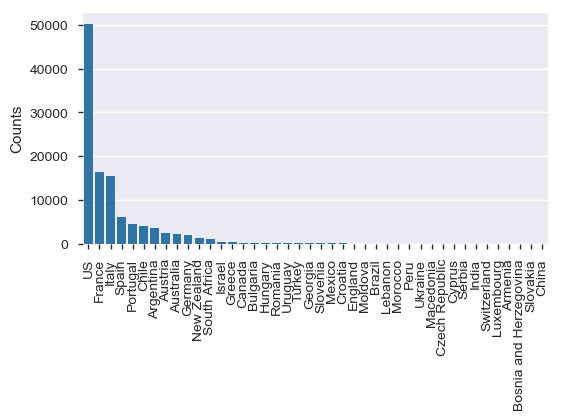

In [13]:
#Distribution of wine reviews for each country
base_color = sns.color_palette()[0]
plt.rcParams['figure.figsize'] = 6,3
count_country = df_clean2['country'].value_counts().index
sns.countplot(data = df_clean2, x = 'country', color = base_color, order = count_country);
plt.xticks(rotation = 90);
plt.xlabel('');
plt.ylabel('Counts');

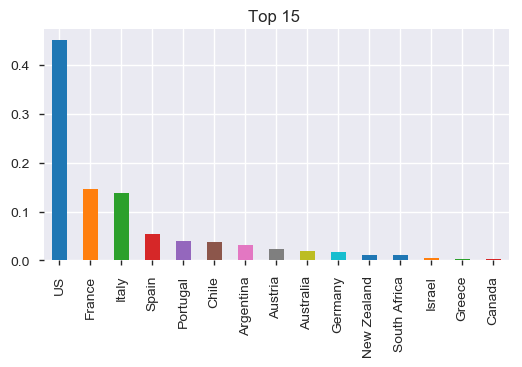

In [14]:
#Narrow down to show only top 15
count_country= df_clean2.country.value_counts()
plt.rcParams['figure.figsize'] = 6,3
# Bar chart of the proportion of the top 15 countries 
(count_country[:15]/df_clean2.shape[0]).plot(kind="bar");
plt.title("Top 15 ");

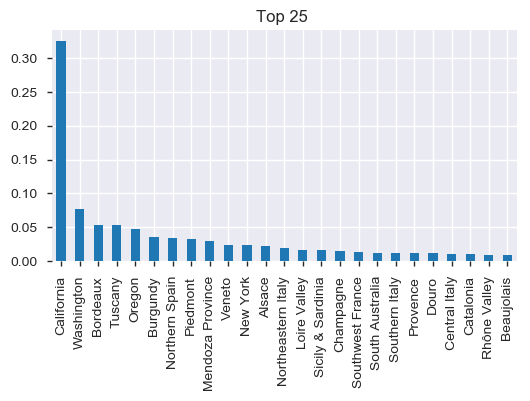

In [15]:
#Provide a pandas series of the different provinces with most ratings
base_color = sns.color_palette()[0]
count_province= df.province.value_counts()
plt.rcParams['figure.figsize'] = 6,3
# Bar chart of the proportion of the top 25 winaries  
(count_province	[:25]/df_clean2.shape[0]).plot(kind="bar", color = base_color);
plt.title("Top 25 ");

##### Note: Most wine reviews from US, followed by France and Italy. For US California and Washington produce most wine.

In [17]:
#Max and min points pr. country
df_clean2.groupby('country').points.agg(['min', 'max'])

,min,max
country,,
Argentina,80,97
Armenia,87,88
Australia,80,100
Austria,82,97
Bosnia and Herzegovina,85,88
Brazil,80,89
Bulgaria,80,91
Canada,82,94
Chile,80,95


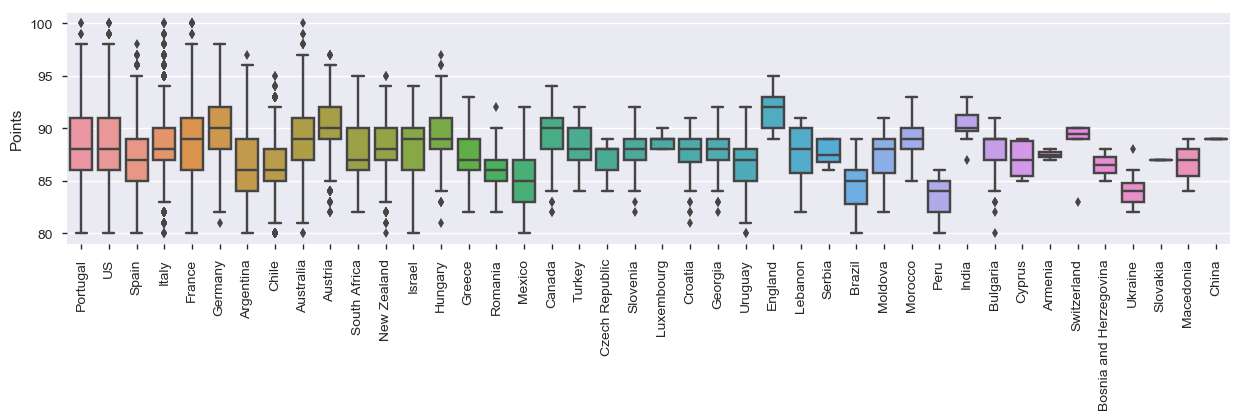

In [18]:
#Raitings for wine in the different contries - using box plot
fig, ax = plt.subplots(figsize = (15,3))
chart = sns.boxplot(x='country',y='points', data=df_clean2)
plt.xticks(rotation = 90)
plt.xlabel('');
plt.ylabel('Points');
plt.show()

#### Doing some analysis of the reviews of the different tasters

In [138]:
print ("Number of ratings without name:", df_clean2.taster_name.isna().sum())

Number of ratings without name; 23268


In [19]:
#Number of wine review for each of the tasters
df_clean2.taster_name.value_counts()

Roger Voss            18543
Michael Schachner     13870
Kerin O’Keefe         8872 
Paul Gregutt          8837 
Virginie Boone        8681 
Matt Kettmann         5642 
Joe Czerwinski        4643 
Sean P. Sullivan      4422 
Anna Lee C. Iijima    3974 
Jim Gordon            3761 
Anne Krebiehl MW      3035 
Lauren Buzzeo         1582 
Susan Kostrzewa       1010 
Mike DeSimone         452  
Jeff Jenssen          436  
Alexander Peartree    381  
Carrie Dykes          128  
Fiona Adams           24   
Christina Pickard     6    
Name: taster_name, dtype: int64

#### Note: 23268 wines does not have name of the reviewer, Roger Voss and Michael Schachner have rated over 10.000 wines.

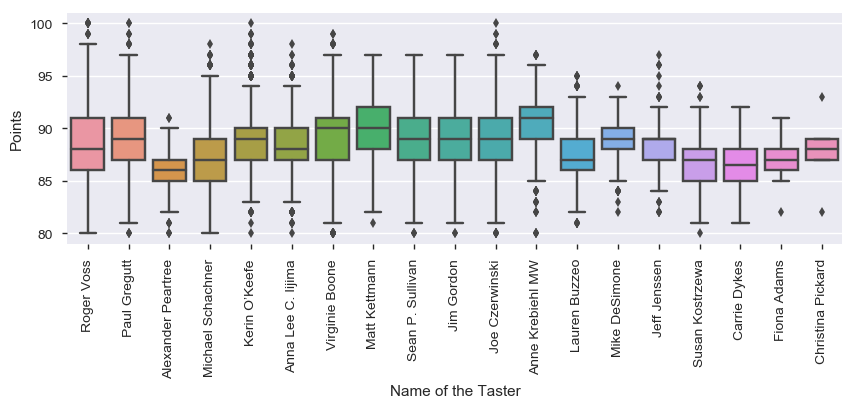

In [20]:
#Using box plot to assess how the different taster have give points 
fig, ax = plt.subplots(figsize = (10,3))
chart = sns.boxplot(x='taster_name', y='points', data=df_clean2)
plt.xticks(rotation = 90)
plt.title("");
plt.xlabel('Name of the Taster');
plt.ylabel('Points');
plt.show()

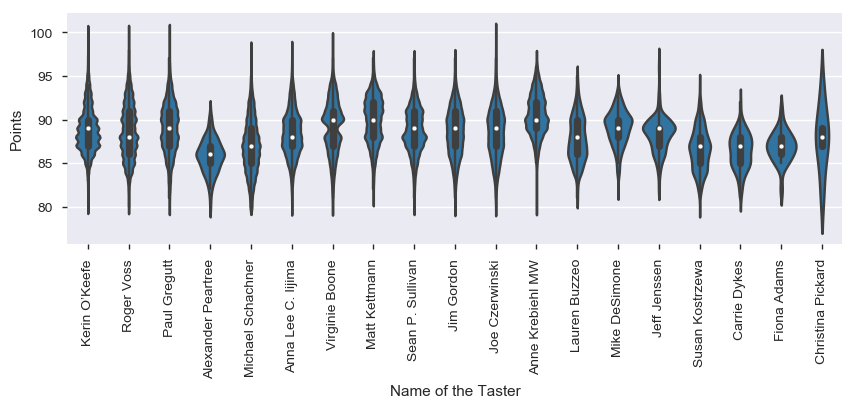

In [21]:
#Using voilin plot to assess how the different taster have give points 
plt.figure(figsize = [10, 3])
base_color = sns.color_palette()[0]
sns.violinplot(data = df, x = 'taster_name', y = 'points', color = base_color)

plt.xlabel('Name of the Taster');
plt.ylabel('Points');
plt.xticks(rotation = 90)
plt.show()

#### In addition that the tasters have rated very different number of wines max over 18.000, min only 6 wines. They have used the rating range different, eg. only 4 tasters have given wine with 100 points. Well over to the questions..

### Question 1 Are there differences in the reviewers description for the best rated wines according to the least rated wines?

In [272]:
print(df_clean2.points.unique())

[ 87  86  85  88  92  91  90  89  83  82  81  80 100  98  97  96  95  93
  94  84  99]


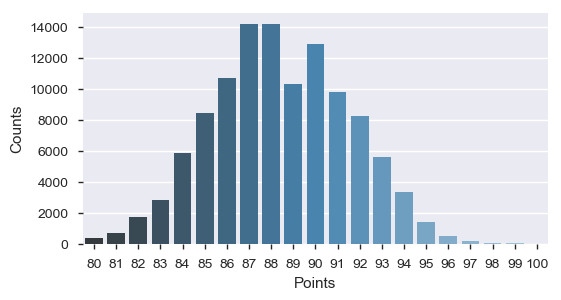

In [16]:
#Distribution of points given in reviews
plt.rcParams['figure.figsize'] = 6,3
sns.countplot(df_clean2['points'], palette="Blues_d");
plt.xlabel('Points');
plt.ylabel('Counts');

In [32]:
df_clean2.points.value_counts(ascending=True)

100    19   
99     28   
98     69   
97     206  
80     395  
96     481  
81     677  
95     1386 
82     1749 
83     2830 
94     3328 
93     5633 
84     5858 
92     8244 
85     8470 
91     9806 
89     10303
86     10745
90     12915
88     14206
87     14219
Name: points, dtype: int64

##### Note - wine reviews are in the range 80 - 100 points. 

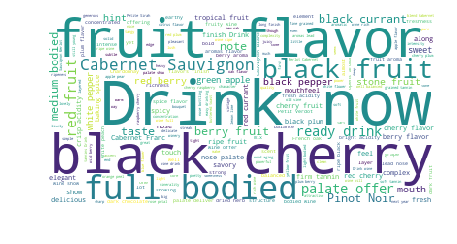

In [33]:
#An easy way to get a view of all the wine descriptions for the whole dataset using WordClouds
#This python version i inspired from https://www.kaggle.com/rounakbanik/the-story-of-film. It filter out common Enghish 'helperword' covered in STOPWORDS
plt.rcParams['figure.figsize'] = 5,6
word_string=" ".join(df_clean2['description'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300
                         ).generate(word_string)
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [74]:
#Select wine review within the lowest range 80-84 points 
df_low = df_clean2.loc[df_clean2.points<85]
df_low.points.value_counts(ascending=True)

80    395 
81    677 
82    1749
83    2830
84    5858
Name: points, dtype: int64

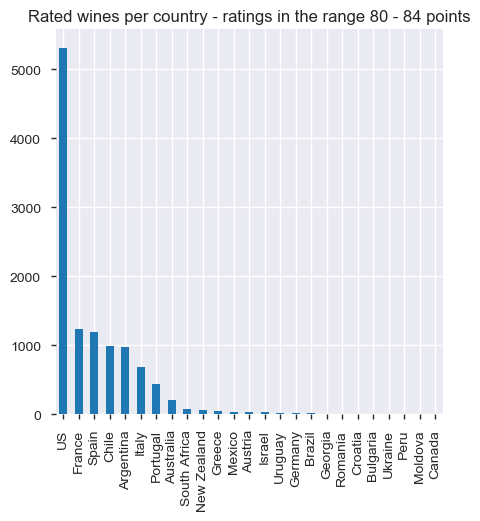

In [36]:
plt.rcParams['figure.figsize'] = 5,5
base_color = sns.color_palette()[0]
count_country= df_low.country.value_counts()
# Bar chart of the proportion of the top 25 winaries  
(count_country[:25]).plot(kind="bar", color = base_color);
plt.title("Rated wines per country - ratings in the range 80 - 84 points");

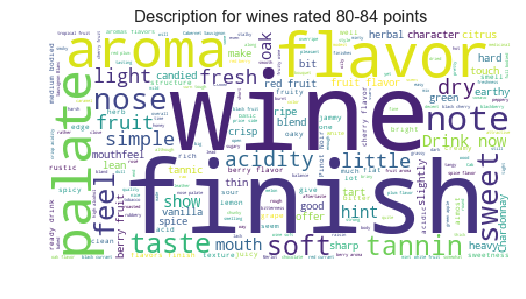

In [41]:
#View of wine descriptions for lowest rated wines (80-84) using WordClouds
#This python version i inspired from https://www.kaggle.com/rounakbanik/the-story-of-film 
plt.rcParams['figure.figsize'] = 6,6
word_string=" ".join(df_low['description'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300
                         ).generate(word_string)
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Description for wines rated 80-84 points");
plt.show()

In [75]:
#Select wine review within the highest range 96-100 points 
df_high = df_clean2.loc[df_clean2.points>95]
df_high.points.value_counts(ascending=True)

100    19 
99     28 
98     69 
97     206
96     481
Name: points, dtype: int64

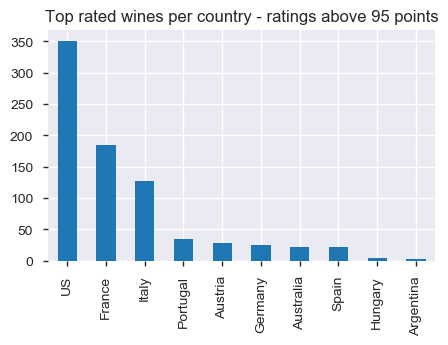

In [42]:
base_color = sns.color_palette()[0]
count_country= df_high.country.value_counts()
plt.rcParams['figure.figsize'] = 5,3
# Bar chart of the proportion of the top 25 winaries  
(count_country[:25]).plot(kind="bar", color = base_color);
plt.title("Top rated wines per country - ratings above 95 points");

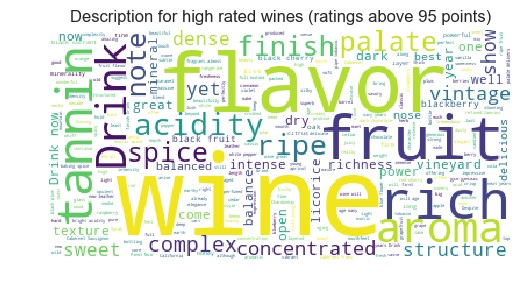

In [79]:
#View of wine descriptions for highetst rated wines (96-100) using WordClouds
#This python version i inspired from https://www.kaggle.com/rounakbanik/the-story-of-film
plt.rcParams['figure.figsize'] = 6,6
word_string=" ".join(df_high['description'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300
                         ).generate(word_string)
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Description for high rated wines (ratings above 95 points)");
plt.show()

#### In both groups we find the words wine and taste, common words high score are: texture, complex, concentrated and charactere. vs low score wines are described as finish, flavor, palate, green and fresh.

### Question 2 - What are the best rated wines in different price categories?

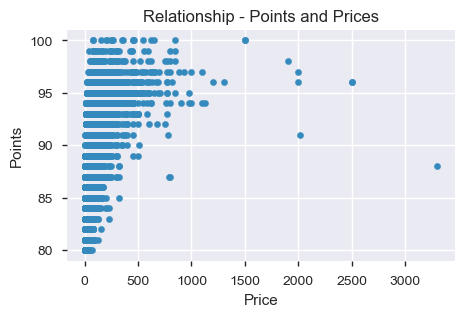

In [43]:
#Inspect the relationship between the two variables - prices and points
plt.rcParams['figure.figsize'] = 5,3
df_clean2.plot(kind='scatter', x = 'price', y= 'points');
plt.title("Relationship - Points and Prices");
plt.xlabel('Price');
plt.ylabel('Points');

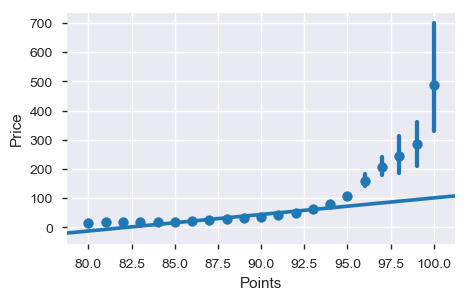

In [98]:
#Plot points showing means and confidence intervals for unique price values
plt.rcParams['figure.figsize'] = 5,3
sns.regplot(x='points', y='price', x_estimator=np.mean, data=df_clean2);
plt.ylabel('Price');
plt.xlabel('Points');

In [44]:
#Min and max price pr. contry
df_clean2.groupby('country').price.agg(['min', 'max'])

,min,max
country,,
Argentina,4.0,230.0
Armenia,14.0,15.0
Australia,5.0,850.0
Austria,7.0,1100.0
Bosnia and Herzegovina,12.0,13.0
Brazil,10.0,60.0
Bulgaria,8.0,100.0
Canada,12.0,120.0
Chile,5.0,400.0


In [62]:
#Min, max and mean prices per points
df_clean2.groupby('points').price.agg(['min', 'max', 'mean'])

,min,max,mean
points,,,
80,5.0,69.0,16.372152
81,5.0,130.0,17.144756
82,4.0,150.0,18.905660
83,4.0,225.0,18.243816
84,4.0,225.0,19.246159
85,4.0,320.0,20.016529
86,4.0,170.0,22.117264
87,5.0,800.0,24.910824
88,6.0,3300.0,28.798254


In [68]:
#Min, max and price per points
df_price = df_clean2.groupby('points').price.agg(['min', 'max', 'mean'])
df_price_1 = df_clean2.groupby('points').price.agg(['min', 'mean'])
df_price_min = df_clean2.groupby('points').price.agg(['min'])
df_price_max = df_clean2.groupby('points').price.agg(['max'])
df_price_mean = df_clean2.groupby('points').price.agg(['mean'])

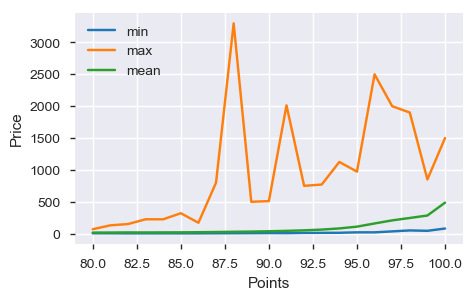

In [64]:
#Inspect the relationship between the two variables - prices and points
#plt.rcParams['figure.figsize'] = 5,3
df_price.plot();
#df_clean2.plot(kind='scatter', x = 'price', y= 'points');
#plt.title("Relationship - Points and Prices");
plt.xlabel('Points');
plt.ylabel('Price');

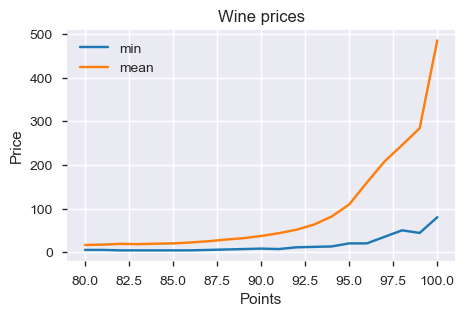

In [70]:
#Looking at more detailes for the lowest and mean price - point ratio
df_price_1.plot();
plt.xlabel('Points');
plt.title("Wine prices");
plt.ylabel('Price');

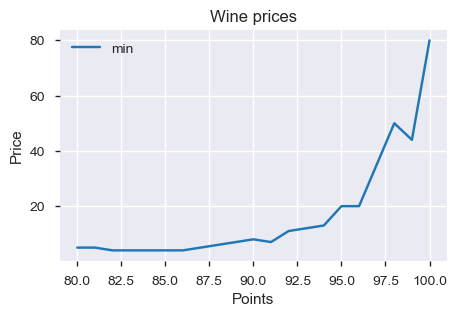

In [73]:
#Looking at more detailes for the lowest and mean price - point ratio
df_price_min.plot();
plt.xlabel('Points');
plt.title("Wine prices");
plt.ylabel('Price');

#####  The price - range given by the wine magazine - use the following 8 categories  
- 1 – 15  - named dfp1
- 16 – 25 - named dfp2
- 26 - 40 - named dfp3
- 41 – 60 - named dfp4
- 61 – 75  - named dfp5
- 76 – 99 - named dfp6
- 100 – 199 - named dfp7
- $200+ - named dfp8

In [48]:
#Wines in price range 1-15
dfp1 = df_clean2[df_clean2['price']<=16].sort_values(['points', 'price'], ascending=[False, True])
dfp1[['title','variety','country', 'province','points','price']][:5]

,title,variety,country,province,points,price
23974,Quinta dos Murças 2011 Assobio Red (Douro),Portuguese Red,Portugal,Douro,94,13.0
19136,Osborne NV Pedro Ximenez 1827 Sweet Sherry Sherry (Jerez),Sherry,Spain,Andalucia,94,14.0
69526,Uvaggio 2010 Secco Moscato Giallo (Lodi),Moscato Giallo,US,California,94,16.0
68720,Château d'Aydie 2010 Aydie l'Origine Tannat-Cabernet Franc (Madiran),Tannat-Cabernet Franc,France,Southwest France,93,12.0
9609,Château Vincens 2011 Prestige Malbec-Merlot (Cahors),Malbec-Merlot,France,Southwest France,93,13.0


In [50]:
#Wines in price range 26-40
dfp2 = df_clean2[(df_clean2.price>15) & (df_clean2.price<26)].sort_values(['points', 'price'], ascending=[False, True])
dfp2[['title','variety','country', 'province','points','price']][:6]

,title,variety,country,province,points,price
101580,Rulo 2007 Syrah (Columbia Valley (WA)),Syrah,US,Washington,96,20.0
5011,Dunham 2010 Lewis Estate Vineyard Riesling (Columbia Valley (WA)),Riesling,US,Washington,95,20.0
15196,Alain Brumont 2010 Château Bouscassé Red (Madiran),Red Blend,France,Southwest France,95,20.0
76570,Januik 2012 Bacchus Vineyard Riesling (Columbia Valley (WA)),Riesling,US,Washington,95,20.0
126242,Poet's Leap 2009 Riesling (Columbia Valley (WA)),Riesling,US,Washington,95,20.0
74813,EOS 2006 Tears of Dew Late Harvest Moscato (Paso Robles),Moscato,US,California,95,22.0


In [51]:
#Wines in price range 26 - 40 - named dfp3
dfp3 = df_clean2[(df_clean2.price>=26) & (df_clean2.price<=40)].sort_values(['points', 'price'], ascending=[False, True])
dfp3[['title','variety','country', 'province','points','price']][:5]

,title,variety,country,province,points,price
114981,Donkey & Goat 2010 Fenaughty Vineyard Syrah (El Dorado),Syrah,US,California,97,35.0
16524,Taylor Fladgate NV 325 Anniversary (Port),Port,Portugal,Port,97,40.0
40309,Isole e Olena 2010 Chianti Classico,Red Blend,Italy,Tuscany,96,27.0
54253,Donkey & Goat 2012 Grenache Noir Grenache (El Dorado),Grenache,US,California,96,27.0
102489,The Eyrie Vineyards 2014 Estate Chardonnay (Dundee Hills),Chardonnay,US,Oregon,96,27.0


In [52]:
#Wine in price range 41 – 60 - named dfp4
dfp4 = df_clean2[(df_clean2.price>=41) & (df_clean2.price<=60)].sort_values(['points', 'price'], ascending=[False, True])
dfp4[['title','variety','country', 'province','points','price']][:7]

,title,variety,country,province,points,price
118059,Failla 2010 Estate Vineyard Chardonnay (Sonoma Coast),Chardonnay,US,California,99,44.0
1560,Pirouette 2008 Red Wine Red (Columbia Valley (WA)),Bordeaux-style Red Blend,US,Washington,98,50.0
117140,Gramercy 2010 Lagniappe Syrah (Columbia Valley (WA)),Syrah,US,Washington,98,55.0
16770,Brezza 2013 Cannubi (Barolo),Nebbiolo,Italy,Piedmont,98,60.0
118061,Mt. Brave 2008 Merlot (Mount Veeder),Merlot,US,California,98,60.0
45986,Château Coutet 2014 Barsac,Bordeaux-style White Blend,France,Bordeaux,97,45.0
4504,Limerick Lane 2013 Rocky Knoll Zinfandel (Russian River Valley),Zinfandel,US,California,97,50.0


In [53]:
#Wine in range 61 – 75 - named dfp5
dfp5 = df_clean2[(df_clean2.price>=61) & (df_clean2.price<=75)].sort_values(['points', 'price'], ascending=[False, True])
dfp5[['title','variety','country', 'province','points','price']][:5]

,title,variety,country,province,points,price
47428,Cayuse 2009 En Chamberlin Vineyard Syrah (Walla Walla Valley (OR)),Syrah,US,Oregon,99,75.0
47429,Williams Selyem 2010 Hirsch Vineyard Pinot Noir (Sonoma Coast),Pinot Noir,US,California,99,75.0
47894,Cayuse 2011 En Chamberlin Vineyard Syrah (Walla Walla Valley (OR)),Syrah,US,Oregon,99,75.0
109332,Williams Selyem 2013 Westside Road Neighbors Pinot Noir (Russian River Valley),Pinot Noir,US,California,98,69.0
16771,Comm. G. B. Burlotto 2013 Monvigliero (Barolo),Nebbiolo,Italy,Piedmont,98,70.0


In [54]:
#Wine in range 76 – 99 - named dfp6
dfp6 = df_clean2[(df_clean2.price>=76) & (df_clean2.price<=99)].sort_values(['points', 'price'], ascending=[False, True])
dfp6[['title','variety','country', 'province','points','price']][:5]

,title,variety,country,province,points,price
113929,Charles Smith 2006 Royal City Syrah (Columbia Valley (WA)),Syrah,US,Washington,100,80.0
123545,Cayuse 2008 Bionic Frog Syrah (Walla Walla Valley (WA)),Syrah,US,Washington,100,80.0
1557,Williams Selyem 2009 Precious Mountain Vineyard Pinot Noir (Sonoma Coast),Pinot Noir,US,California,99,94.0
56954,Wayfarer 2014 Wayfarer Vineyard Chardonnay (Fort Ross-Seaview),Chardonnay,US,California,98,80.0
121933,Brovia 2013 Garblèt Suè (Barolo),Nebbiolo,Italy,Piedmont,98,83.0


In [55]:
#Wine in range 100-199   
dfp7 = df_clean2[(df_clean2.price>=100) & (df_clean2.price<=199)].sort_values(['points', 'price'], ascending=[False, True])
dfp7[['title','variety','country', 'province','points','price']][:5]

,title,variety,country,province,points,price
58352,Château Léoville Barton 2010 Saint-Julien,Bordeaux-style Red Blend,France,Bordeaux,100,150.0
128265,Trefethen 2005 Reserve Cabernet Sauvignon (Oak Knoll District),Cabernet Sauvignon,US,California,99,100.0
1556,Quilceda Creek 2008 Cabernet Sauvignon (Columbia Valley (WA)),Cabernet Sauvignon,US,Washington,99,125.0
107901,Venge 2008 Family Reserve Cabernet Sauvignon (Oakville),Cabernet Sauvignon,US,California,99,125.0
121885,David Arthur 2009 Elevation 1147 Estate Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,US,California,99,150.0


In [56]:
#Wines >=$200
dfp8 = df_clean2[df_clean2['price']>=200].sort_values(['points', 'price'], ascending=[False, True])
dfp8[['title','variety','country', 'province','points','price']][:5]

,title,variety,country,province,points,price
45798,Cardinale 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,US,California,100,200.0
7335,Avignonesi 1995 Occhio di Pernice (Vin Santo di Montepulciano),Prugnolo Gentile,Italy,Tuscany,100,210.0
89728,Louis Roederer 2008 Cristal Vintage Brut (Champagne),Champagne Blend,France,Champagne,100,250.0
36528,Krug 2002 Brut (Champagne),Champagne Blend,France,Champagne,100,259.0
111754,Casanova di Neri 2007 Cerretalto (Brunello di Montalcino),Sangiovese Grosso,Italy,Tuscany,100,270.0


In [57]:
#How many 100 points rated wines with names, prices, etc..?
df_100p = df_clean2[df_clean2['points']==100]
df_100p[['title','variety','country', 'province','points','price']]

,title,variety,country,province,points,price
345,Chambers Rosewood Vineyards NV Rare Muscat (Rutherglen),Muscat,Australia,Victoria,100,350.0
7335,Avignonesi 1995 Occhio di Pernice (Vin Santo di Montepulciano),Prugnolo Gentile,Italy,Tuscany,100,210.0
36528,Krug 2002 Brut (Champagne),Champagne Blend,France,Champagne,100,259.0
39286,Tenuta dell'Ornellaia 2007 Masseto Merlot (Toscana),Merlot,Italy,Tuscany,100,460.0
42197,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red,Portugal,Douro,100,450.0
45781,Biondi Santi 2010 Riserva (Brunello di Montalcino),Sangiovese,Italy,Tuscany,100,550.0
45798,Cardinale 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,US,California,100,200.0
58352,Château Léoville Barton 2010 Saint-Julien,Bordeaux-style Red Blend,France,Bordeaux,100,150.0
89728,Louis Roederer 2008 Cristal Vintage Brut (Champagne),Champagne Blend,France,Champagne,100,250.0
89729,Salon 2006 Le Mesnil Blanc de Blancs Brut Chardonnay (Champagne),Chardonnay,France,Champagne,100,617.0


#### Answer qustion 3: 

### What kind of grapes make the best wine?

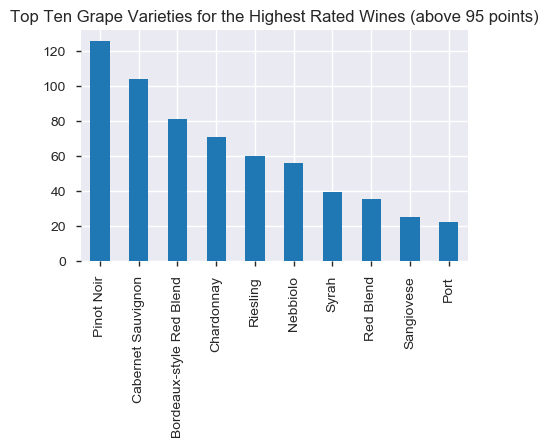

In [58]:
#Count and plot top ten grape varietiets 
plt.rcParams['figure.figsize'] = 5,3
base_color = sns.color_palette()[0]
count_hp_variety = df_high.variety.value_counts()
(count_hp_variety[:10].plot(kind="bar", color=base_color))
plt.title("Top Ten Grape Varieties for the Highest Rated Wines (above 95 points)");

In [60]:
df_high.variety.value_counts().head(5)

Pinot Noir                  126
Cabernet Sauvignon          104
Bordeaux-style Red Blend    81 
Chardonnay                  71 
Riesling                    60 
Name: variety, dtype: int64

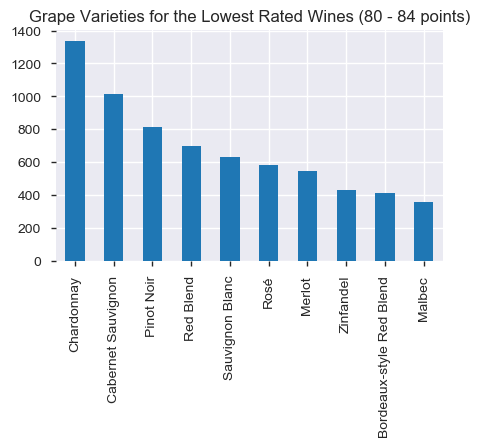

In [59]:
#For coriosity what grape is used in the oposite range of the scale   
plt.rcParams['figure.figsize'] = 5,3
base_color = sns.color_palette()[0]
count_lp_variety = df_low.variety.value_counts()

#Bar chart of the proportion 
(count_lp_variety[:10].plot(kind="bar", color = base_color))
plt.title("Grape Varieties for the Lowest Rated Wines (80 - 84 points)");

In [220]:
df_low.variety.value_counts().head(5)

Chardonnay            1339
Cabernet Sauvignon    1016
Pinot Noir            811 
Red Blend             695 
Sauvignon Blanc       629 
Name: variety, dtype: int64

#### "Custom made" - different illustration figures for use in the article introduction

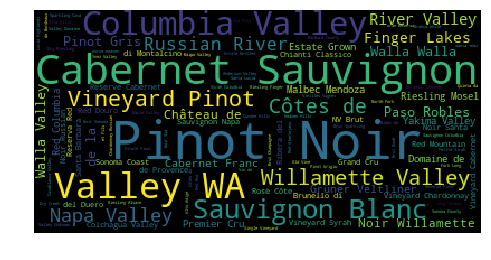

In [162]:
#This python version of Worldcload was inspired from https://www.kaggle.com/rounakbanik/the-story-of-film 
#It filter out common Enghish 'help word' covered in STOPWORDS
plt.rcParams['figure.figsize'] = 5,3
word_string=" ".join(df_clean2['title'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='black',
                      max_words=200).generate(word_string)
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

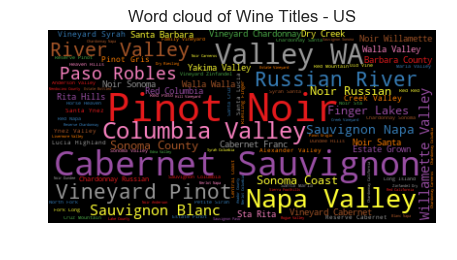

In [224]:
#Wordcloud from US wine titles
plt.figure(figsize= (5,3))
plt.title('Word cloud of Wine Titles - US')
wc = WordCloud(max_words=1000,max_font_size=40,background_color='black', stopwords = STOPWORDS)
wc.generate(' '.join(df_clean2[df_clean2['country'] =='US']['title']))
plt.imshow(wc.recolor(colormap='Set1'),interpolation="bilinear");
plt.axis('off');

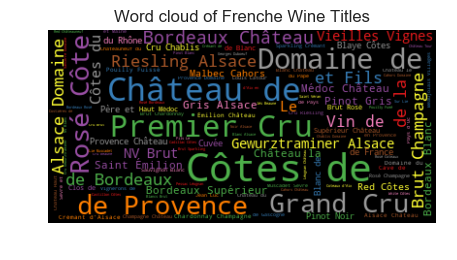

In [226]:
#Wordcloud from only French wine titles
plt.figure(figsize= (5,3))
plt.title('Word cloud of Frenche Wine Titles')
wc = WordCloud(max_words=1000,max_font_size=40,background_color='black', stopwords = STOPWORDS)
wc.generate(' '.join(df_clean2[df_clean2['country'] =='France']['title']))
plt.imshow(wc.recolor(colormap='Set1'),interpolation="bilinear");
plt.axis('off');

In [57]:
#To costum make the articles illustration picture a World Cloud of all wine titles was made using a grape siluette downloaded from 
#https://silhouettegarden.com/download/grapes-silhouette/
wine_mask = np.array(Image.open('../Wine_Data/grapes-silhouette.png'))

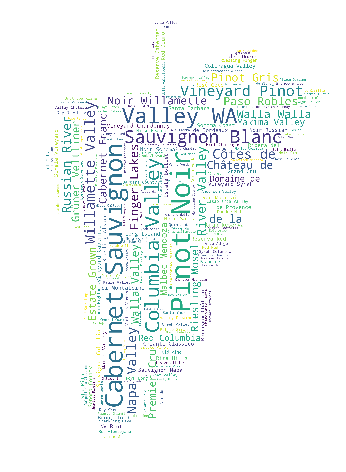

In [133]:
#This python version of Worldcload was inspired from https://www.kaggle.com/rounakbanik/the-story-of-film 
#It filter out common Enghish 'help word' covered in STOPWORDS
plt.rcParams['figure.figsize'] = 8,8
word_string=" ".join(df_clean2['title'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', mask=wine_mask,
                      max_words=200).generate(word_string)
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

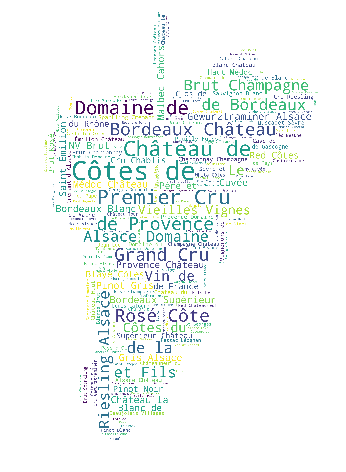

In [165]:
#Wordcloud from only French wine titles
plt.rcParams['figure.figsize'] = 8,8

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', mask=wine_mask,
                      max_words=200).generate(' '.join(df_clean2[df_clean2['country'] =='France']['title']))
plt.clf()

plt.imshow(wordcloud)
plt.axis('off')
plt.show()